## Machine Learning Final ##

In [1]:
import numpy as np
import pandas as pd

campus_placement = pd.read_csv("data/Campus_Selection.csv")
print(campus_placement.columns)
print(campus_placement.shape)
campus_placement.info()
campus_placement.head()

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status'],
      dtype='object')
(215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status         

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


Steps of EDA:

1. (pre-)process data
2. summarize/profile data
3. visualize distribution and relationships
4. come up with questions/hypothesis
5. answer questions/hypothesis


The data is from a website called Kaggle, a subsidiary of Goolge, which allows people to publish data sets and them to be downloaded for use. The users who published it are named "MERUVU LIKITH" and "Ben Roshan". It includes data from a course at Jain University in India, but does not specify where the data origniates from

The data is comprised of 3,010 entries of scholastic statistics. Each applicant (row) has 14 distinct features that are described in this data set. The 10 features are: 'sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'. Only 6 of the values are float or integer types, meaning that 8 of the values are object types, that will likely need to be encoded later.

In this dataset, we can use the values to predict the students applicant status to said unnamed university. This is a categorical data type, so it would incorporate logistic regression, or categorical prediction models. However, it is also interesting to examine the percentage scores of the applicants. Theres a possibility to see which percentage score is most important to Masters/PHD degree applicants, as well as checking to see if averaging all of the percentage for every schooling (secondary, higher secondary, undergraduate, and MBA) still correlates well to being accepted. We can also predict these individual values.  

## Good question to ask in the write up ##


What is the Domain/Area of this dataset and what kind of prediction (regression, classification or clustering) we are doing with this dataset and why? Describe the additional insights (if any) you get from generating the pandas data profile report, which you did not observe in the previous EDA steps. Does it change your thinking process or provide any ideas about data pre-processing or processing steps?

Immediatly its obvious the column names are not informative. In order to improve the understanding of the dataset, they should be renamed immediately.

In [2]:
oringial_columns = campus_placement.columns
print(oringial_columns)
new_columns = ['serial_num', 'gender', 'sec_edu_percentile', 'sec_edu_board', 'higher_sec_edu_percentile',
              'higher_sec_edu_board', 'high_sec_edu_type', 'undergrad_percentile', 'undergrad_type', 'work_ex',
              'employ_test_percentile', 'MBA_type', 'MBA_percentile', 'app_status']

campus_placement.rename(columns=dict(zip(oringial_columns, new_columns)), inplace=True)

campus_placement.head()


Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status'],
      dtype='object')


,serial_num,gender,sec_edu_percentile,sec_edu_board,higher_sec_edu_percentile,higher_sec_edu_board,high_sec_edu_type,undergrad_percentile,undergrad_type,work_ex,employ_test_percentile,MBA_type,MBA_percentile,app_status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


I also will drop serial number, as they are practically the same as the row indices, and have no impact on if the student is chosen or not.

In [3]:
campus_placement = campus_placement.drop('serial_num', axis = 1)
campus_placement.head()

,gender,sec_edu_percentile,sec_edu_board,higher_sec_edu_percentile,higher_sec_edu_board,high_sec_edu_type,undergrad_percentile,undergrad_type,work_ex,employ_test_percentile,MBA_type,MBA_percentile,app_status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


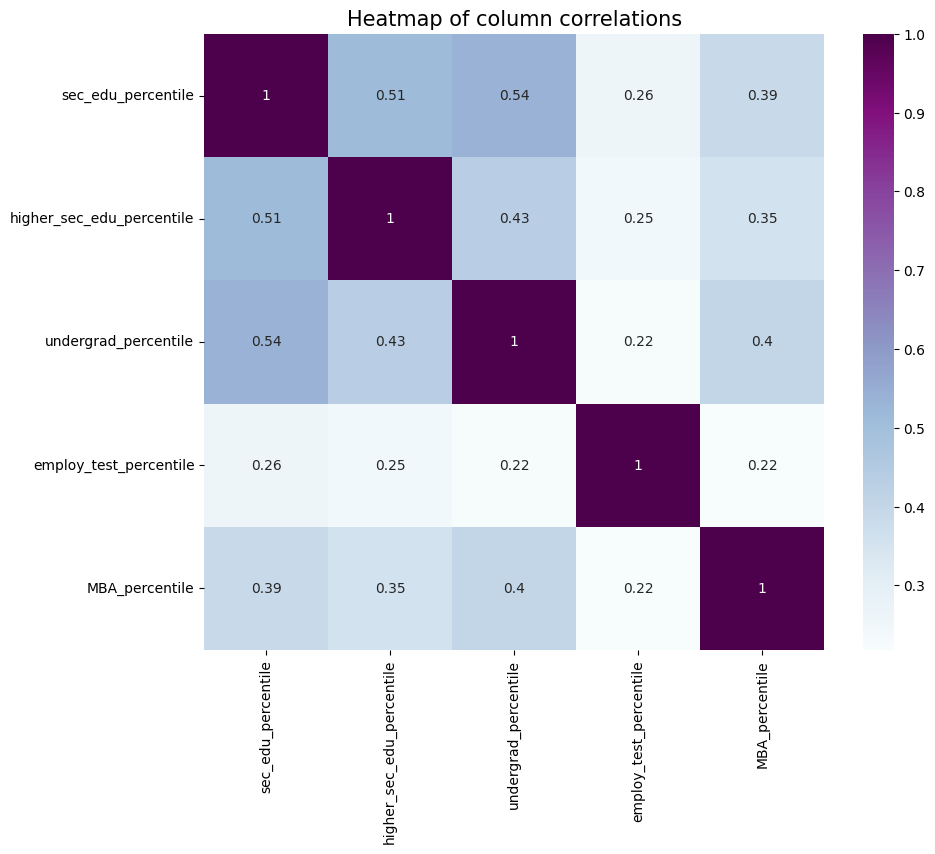

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotHeatmap(dataframe, title):
    numeric_cols = dataframe.select_dtypes(include=['int', 'float']).columns
    numeric_df = dataframe[numeric_cols]
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), cmap="BuPu", annot=True)
    plt.title(title, fontsize=15)
    plt.show()

plotHeatmap(campus_placement, 'Heatmap of column correlations')

The above heatmap, shows only the numerical data as it the rest has yet to be incoded. While it is unfinihsed, it's worth looking at how the different percentiles affect each other. We see that all the different percentiles are relatively weakly correlated. There are a variety of reasons for this:
- Different schools have different curriculumns
- Less consistancy between curriculums
- Think of more...

## Encoding ##

I now need to encode my categorical variables. The columns that have to be encoded are 'gender', 'sec_edu_board', 'higher_sec_edu_board', 'high_sec_edu_type', 'undergrad_type', 'work_ex', 'MBA_type', 'app_status'. All of these can be encoded using scikit learns ordinal encoder, which transforms all values into numerical values. Before doing any of this, I want to graph the amount of students with each disciplin get accepted into university.

<ipython-input-5-93de72071896>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='high_sec_edu_type', y='count', data=placed_counts, palette='BuPu')


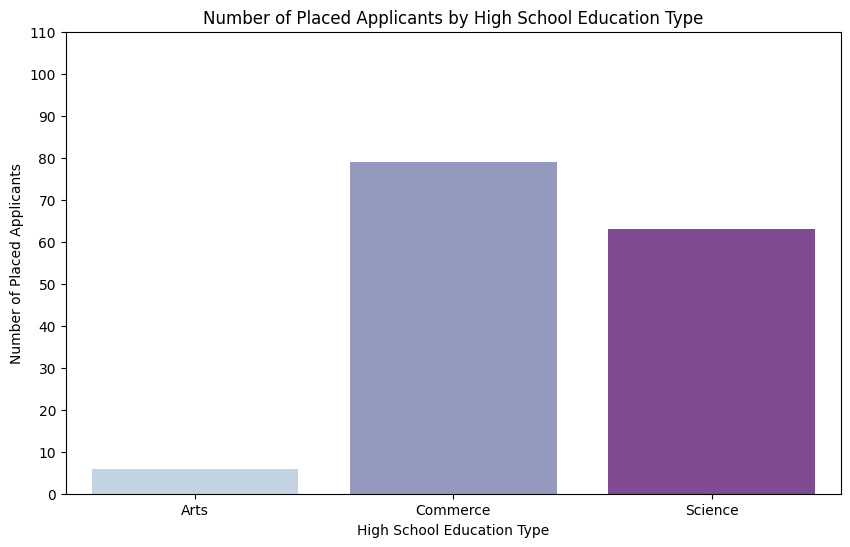

In [5]:

placed_df = campus_placement[campus_placement['app_status'] == 'Placed']
placed_counts = placed_df.groupby('high_sec_edu_type').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='high_sec_edu_type', y='count', data=placed_counts, palette='BuPu')
plt.title('Number of Placed Applicants by High School Education Type')
plt.xlabel('High School Education Type')
plt.ylabel('Number of Placed Applicants')
plt.ylim(0, 110)
plt.yticks(range(0, 111, 10))
plt.show()

<ipython-input-6-2c2e767919ed>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='undergrad_type', y='count', data=placed_counts2, palette='BuPu')


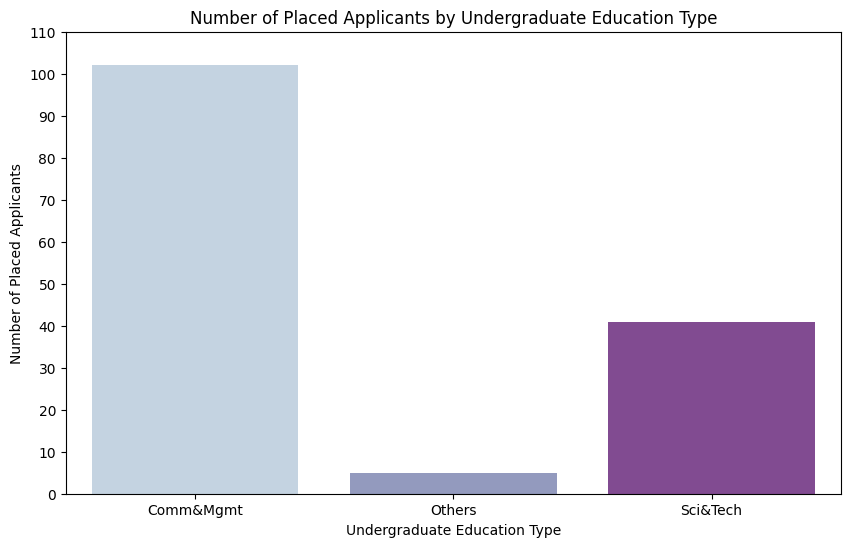

In [6]:
placed_df2 = campus_placement[campus_placement['app_status'] == 'Placed']
placed_counts2 = placed_df2.groupby('undergrad_type').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='undergrad_type', y='count', data=placed_counts2, palette='BuPu')
plt.title('Number of Placed Applicants by Undergraduate Education Type')
plt.xlabel('Undergraduate Education Type')
plt.ylabel('Number of Placed Applicants')
plt.ylim(0, 110)
plt.yticks(range(0, 111, 10))
plt.show()

<ipython-input-7-2bae32744b1c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MBA_type', y='count', data=placed_counts3, palette='BuPu')


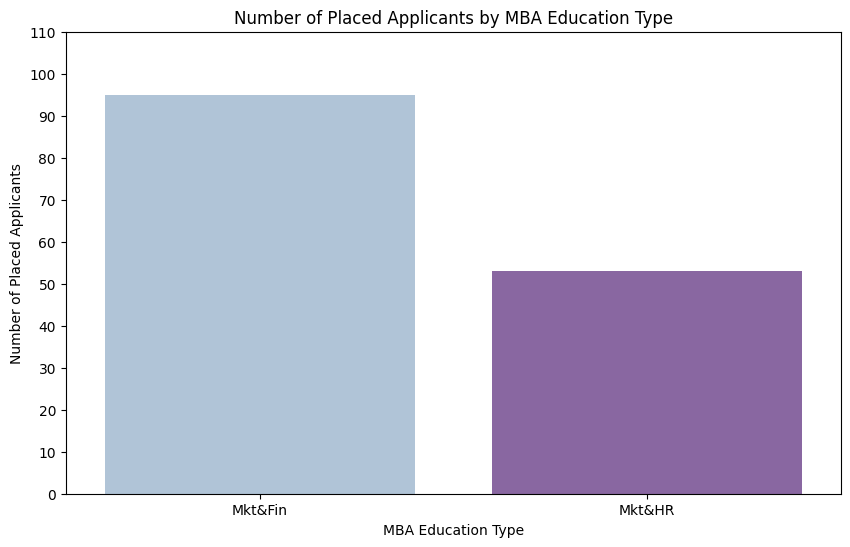

In [7]:
placed_df3 = campus_placement[campus_placement['app_status'] == 'Placed']
placed_counts3 = placed_df3.groupby('MBA_type').size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(x='MBA_type', y='count', data=placed_counts3, palette='BuPu')
plt.title('Number of Placed Applicants by MBA Education Type')
plt.xlabel('MBA Education Type')
plt.ylabel('Number of Placed Applicants')
plt.ylim(0, 110)
plt.yticks(range(0, 111, 10))
plt.show()


These graphs show that there are some degrees that are more likely to recieve acceptance to this university, and others that are not. We also can see from these that each applicant has attended all 3 different categories of institution (higher_sec, undergrad, and MBA). I realized that encoding these varaibles will lead to incorrect correlation coefficients when I look them up. In order to find the ideal values, we should instead create columns for each concentration in each of the different schooling levels, this way, we don't have to assign numerical values based on limited data exploration.

In [8]:
dummy_vars = pd.get_dummies(campus_placement['high_sec_edu_type'])

dummy_vars = dummy_vars.astype(int)

campus_placement = pd.concat([campus_placement, dummy_vars], axis=1)

campus_placement.rename(columns={'Arts': 'high_sec_edu_Arts',
                                 'Commerce': 'high_sec_edu_Commerce',
                                 'Science': 'high_sec_edu_Science'}, inplace=True)

# campus_placement.head()

In [9]:
dummy_vars = pd.get_dummies(campus_placement['undergrad_type'])

dummy_vars = dummy_vars.astype(int)

campus_placement = pd.concat([campus_placement, dummy_vars], axis=1)

campus_placement.rename(columns={'Comm&Mgmt': 'undergrad_Comm&Mgmt',
                                 'Others': 'undergrad_Others',
                                 'Sci&Tech': 'undergrad_Sci&Tech'}, inplace=True)
# campus_placement.head()

In [10]:
dummy_vars = pd.get_dummies(campus_placement['MBA_type'])

dummy_vars = dummy_vars.astype(int)

campus_placement = pd.concat([campus_placement, dummy_vars], axis=1)

campus_placement.rename(columns={'Mkt&HR': 'MBA_Mkt&HR',
                                 'Mkt&Fin': 'MBA_Mkt&Fin'}, inplace=True)
# campus_placement.head()

There are now the addtional columns, but the order is incorrect. They should be reordered to increase the dataframe's readability

In [11]:
new_column_order = ['gender', 'sec_edu_percentile', 'sec_edu_board', 'higher_sec_edu_percentile',
                    'higher_sec_edu_board', 'high_sec_edu_type', 'high_sec_edu_Arts', 'high_sec_edu_Commerce',
                   'high_sec_edu_Science', 'undergrad_percentile', 'undergrad_type', 'undergrad_Comm&Mgmt',
                   'undergrad_Others', 'undergrad_Sci&Tech','MBA_percentile', 'MBA_type', 'MBA_Mkt&Fin',
                    'MBA_Mkt&HR', 'work_ex', 'employ_test_percentile','app_status']
campus_placement = campus_placement[new_column_order]
# campus_placement.head()

The dataframe is now finished and organized.

In [12]:
campus_placement.dtypes

gender                        object
sec_edu_percentile           float64
sec_edu_board                 object
higher_sec_edu_percentile    float64
higher_sec_edu_board          object
high_sec_edu_type             object
high_sec_edu_Arts              int64
high_sec_edu_Commerce          int64
high_sec_edu_Science           int64
undergrad_percentile         float64
undergrad_type                object
undergrad_Comm&Mgmt            int64
undergrad_Others               int64
undergrad_Sci&Tech             int64
MBA_percentile               float64
MBA_type                      object
MBA_Mkt&Fin                    int64
MBA_Mkt&HR                     int64
work_ex                       object
employ_test_percentile       float64
app_status                    object
dtype: object

The dataframe still contains object types, some of which need to be encoded. I will now proceed to encoding "gender", "work_ex" (work experience), "app_status" (application status) and both "board" columns. The columns with object type remaing have already been delt with by adding new columns with their respective values (high_sec_edu_type, undergrad_type, MBA_type).

In [13]:
campus_placement['gender'].unique()

array(['M', 'F'], dtype=object)

In [14]:
from sklearn.preprocessing import OrdinalEncoder
#reference: https://datascience.stackexchange.com/questions/72343/encoding-with-
# ordinalencoder-how-to-give-levels-as-user-input

def encode_column(dataframe, source_column, source_ordered_categories):
    source_ordinal_encoder = OrdinalEncoder(categories=[source_ordered_categories])
    new_source_ordinal = dataframe[source_column].values.reshape(-1, 1)
    ordinal_source_encoded = source_ordinal_encoder.fit_transform(new_source_ordinal)
    return ordinal_source_encoded

In [15]:
encoded_gender = encode_column(campus_placement, 'gender', ['F', 'M'])

campus_placement['gender'] = encoded_gender

campus_placement.rename(columns={'gender': 'is_male'}, inplace=True)

campus_placement.head()

,is_male,sec_edu_percentile,sec_edu_board,higher_sec_edu_percentile,higher_sec_edu_board,high_sec_edu_type,high_sec_edu_Arts,high_sec_edu_Commerce,high_sec_edu_Science,undergrad_percentile,...,undergrad_Comm&Mgmt,undergrad_Others,undergrad_Sci&Tech,MBA_percentile,MBA_type,MBA_Mkt&Fin,MBA_Mkt&HR,work_ex,employ_test_percentile,app_status
0,1.0,67.00,Others,91.00,Others,Commerce,0,1,0,58.00,...,0,0,1,58.80,Mkt&HR,0,1,No,55.0,Placed
1,1.0,79.33,Central,78.33,Others,Science,0,0,1,77.48,...,0,0,1,66.28,Mkt&Fin,1,0,Yes,86.5,Placed
2,1.0,65.00,Central,68.00,Central,Arts,1,0,0,64.00,...,1,0,0,57.80,Mkt&Fin,1,0,No,75.0,Placed
3,1.0,56.00,Central,52.00,Central,Science,0,0,1,52.00,...,0,0,1,59.43,Mkt&HR,0,1,No,66.0,Not Placed
4,1.0,85.80,Central,73.60,Central,Commerce,0,1,0,73.30,...,1,0,0,55.50,Mkt&Fin,1,0,No,96.8,Placed


I encoded the feature 'gender' to be 1s for male and 0s for female applicants. As a result of this decision I changed the feature name to 'is_male'.

Text(0.5, 1.0, 'Proportion of Male and Female Applicants')

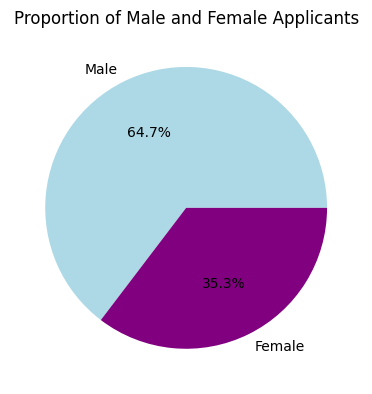

In [16]:
males = campus_placement['is_male'].sum()
females = len(campus_placement) - males
gender_labels = ['Male', 'Female']
gender_data = [males, females]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(gender_data, labels=gender_labels, autopct='%1.1f%%', colors=['lightblue', 'purple'])
plt.title('Proportion of Male and Female Applicants')

In [17]:
campus_placement['work_ex'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
encoded_work_ex = encode_column(campus_placement, 'work_ex', ['No', 'Yes'])

campus_placement['work_ex'] = encoded_work_ex
campus_placement.head()


,is_male,sec_edu_percentile,sec_edu_board,higher_sec_edu_percentile,higher_sec_edu_board,high_sec_edu_type,high_sec_edu_Arts,high_sec_edu_Commerce,high_sec_edu_Science,undergrad_percentile,...,undergrad_Comm&Mgmt,undergrad_Others,undergrad_Sci&Tech,MBA_percentile,MBA_type,MBA_Mkt&Fin,MBA_Mkt&HR,work_ex,employ_test_percentile,app_status
0,1.0,67.00,Others,91.00,Others,Commerce,0,1,0,58.00,...,0,0,1,58.80,Mkt&HR,0,1,0.0,55.0,Placed
1,1.0,79.33,Central,78.33,Others,Science,0,0,1,77.48,...,0,0,1,66.28,Mkt&Fin,1,0,1.0,86.5,Placed
2,1.0,65.00,Central,68.00,Central,Arts,1,0,0,64.00,...,1,0,0,57.80,Mkt&Fin,1,0,0.0,75.0,Placed
3,1.0,56.00,Central,52.00,Central,Science,0,0,1,52.00,...,0,0,1,59.43,Mkt&HR,0,1,0.0,66.0,Not Placed
4,1.0,85.80,Central,73.60,Central,Commerce,0,1,0,73.30,...,1,0,0,55.50,Mkt&Fin,1,0,0.0,96.8,Placed


In [19]:
campus_placement['app_status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [20]:
encoded_app_status = encode_column(campus_placement, 'app_status', ['Not Placed', 'Placed'])

campus_placement['app_status'] = encoded_app_status
campus_placement['app_status'] = campus_placement['app_status'].astype(float).astype(int)
campus_placement.head()


,is_male,sec_edu_percentile,sec_edu_board,higher_sec_edu_percentile,higher_sec_edu_board,high_sec_edu_type,high_sec_edu_Arts,high_sec_edu_Commerce,high_sec_edu_Science,undergrad_percentile,...,undergrad_Comm&Mgmt,undergrad_Others,undergrad_Sci&Tech,MBA_percentile,MBA_type,MBA_Mkt&Fin,MBA_Mkt&HR,work_ex,employ_test_percentile,app_status
0,1.0,67.00,Others,91.00,Others,Commerce,0,1,0,58.00,...,0,0,1,58.80,Mkt&HR,0,1,0.0,55.0,1
1,1.0,79.33,Central,78.33,Others,Science,0,0,1,77.48,...,0,0,1,66.28,Mkt&Fin,1,0,1.0,86.5,1
2,1.0,65.00,Central,68.00,Central,Arts,1,0,0,64.00,...,1,0,0,57.80,Mkt&Fin,1,0,0.0,75.0,1
3,1.0,56.00,Central,52.00,Central,Science,0,0,1,52.00,...,0,0,1,59.43,Mkt&HR,0,1,0.0,66.0,0
4,1.0,85.80,Central,73.60,Central,Commerce,0,1,0,73.30,...,1,0,0,55.50,Mkt&Fin,1,0,0.0,96.8,1


Text(0.5, 1.0, 'Proportion of Accepted and Rejected Applicants')

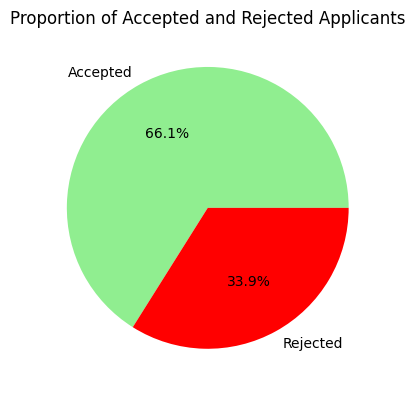

In [21]:
accepted = campus_placement['app_status'].sum()
rejected = len(campus_placement) - males
app_status_labels = ['Accepted', 'Rejected']
app_status_data = [accepted, rejected]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(app_status_data, labels=app_status_labels, autopct='%1.1f%%', colors=['lightgreen', 'red'])
plt.title('Proportion of Accepted and Rejected Applicants')

In [22]:
campus_placement.dtypes

is_male                      float64
sec_edu_percentile           float64
sec_edu_board                 object
higher_sec_edu_percentile    float64
higher_sec_edu_board          object
high_sec_edu_type             object
high_sec_edu_Arts              int64
high_sec_edu_Commerce          int64
high_sec_edu_Science           int64
undergrad_percentile         float64
undergrad_type                object
undergrad_Comm&Mgmt            int64
undergrad_Others               int64
undergrad_Sci&Tech             int64
MBA_percentile               float64
MBA_type                      object
MBA_Mkt&Fin                    int64
MBA_Mkt&HR                     int64
work_ex                      float64
employ_test_percentile       float64
app_status                     int64
dtype: object

In [23]:
campus_placement['sec_edu_board'].unique()

array(['Others', 'Central'], dtype=object)

In [24]:
encoded_sec_edu_board = encode_column(campus_placement, 'sec_edu_board', ['Others', 'Central'])

campus_placement['sec_edu_board'] = encoded_sec_edu_board
campus_placement.rename(columns={'sec_edu_board': 'sec_edu_board_is_central'}, inplace=True)

# campus_placement.head()

In [25]:
encoded_higher_sec_edu_board = encode_column(campus_placement, 'higher_sec_edu_board', ['Others', 'Central'])

campus_placement['higher_sec_edu_board'] = encoded_higher_sec_edu_board
campus_placement.rename(columns={'higher_sec_edu_board': 'higher_sec_edu_board_is_central'}, inplace=True)

Now I want to check for null values and see if they need to be inputed.

In [26]:
campus_placement.isnull().sum()


is_male                            0
sec_edu_percentile                 0
sec_edu_board_is_central           0
higher_sec_edu_percentile          0
higher_sec_edu_board_is_central    0
high_sec_edu_type                  0
high_sec_edu_Arts                  0
high_sec_edu_Commerce              0
high_sec_edu_Science               0
undergrad_percentile               0
undergrad_type                     0
undergrad_Comm&Mgmt                0
undergrad_Others                   0
undergrad_Sci&Tech                 0
MBA_percentile                     0
MBA_type                           0
MBA_Mkt&Fin                        0
MBA_Mkt&HR                         0
work_ex                            0
employ_test_percentile             0
app_status                         0
dtype: int64

There are no null vlaues. Now to check for outliers.

## Feature Selection

In [27]:
def plotBoxplot(dataframe, columns, title):
    plt.figure(figsize=(10,8))
    boxplot = dataframe.boxplot(column=columns)
    plt.title(title)



I created a function to plot the boxplot for each column in a list of columns I generate. Below I chose the columns to which this check pertains. There will be no outliers in object type columns, or columns where the only values are between 0 and 1.

In [28]:
campus_placement_columns = ['sec_edu_percentile', 'higher_sec_edu_percentile', 'undergrad_percentile',
                           'MBA_percentile', 'employ_test_percentile']

<Figure size 400x400 with 0 Axes>

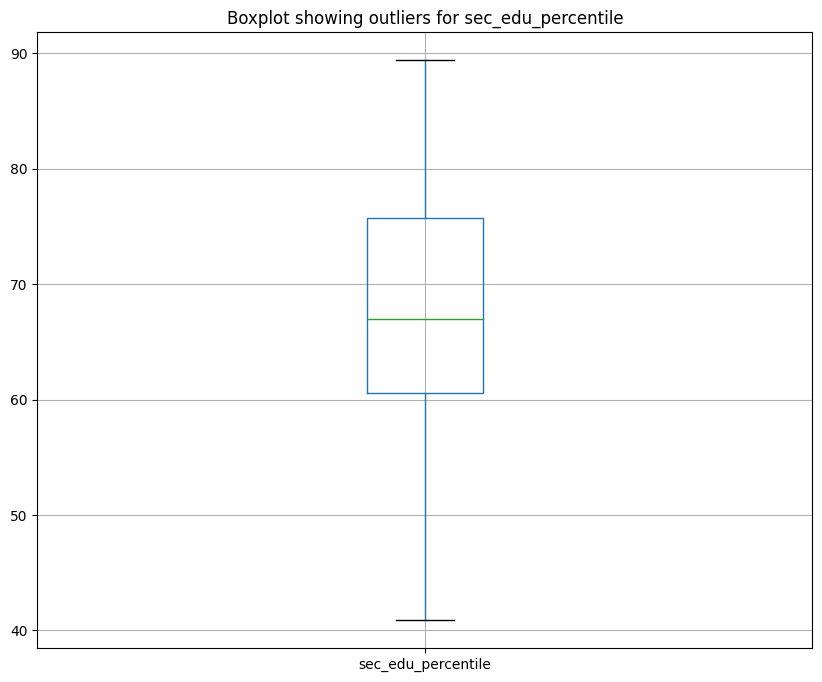

<Figure size 400x400 with 0 Axes>

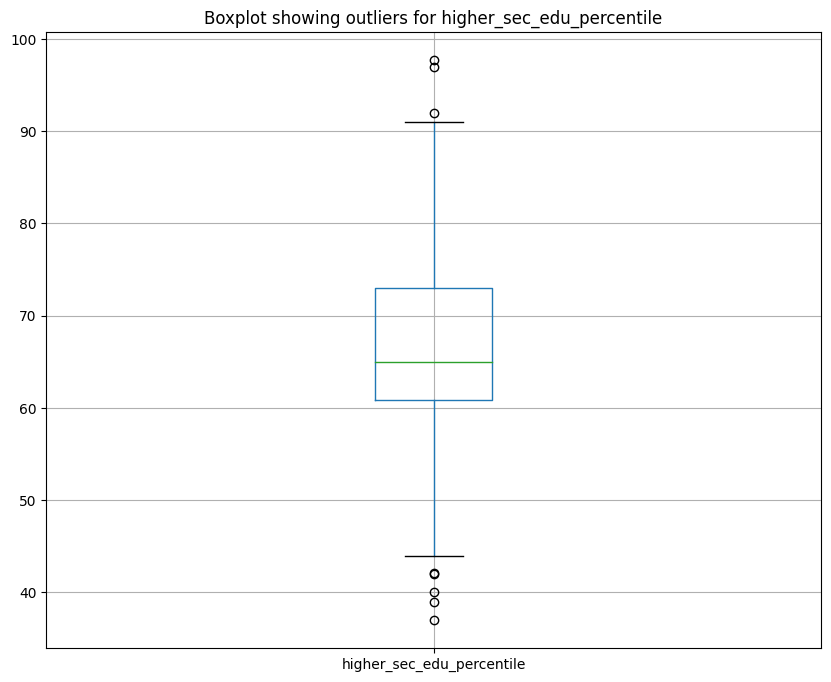

<Figure size 400x400 with 0 Axes>

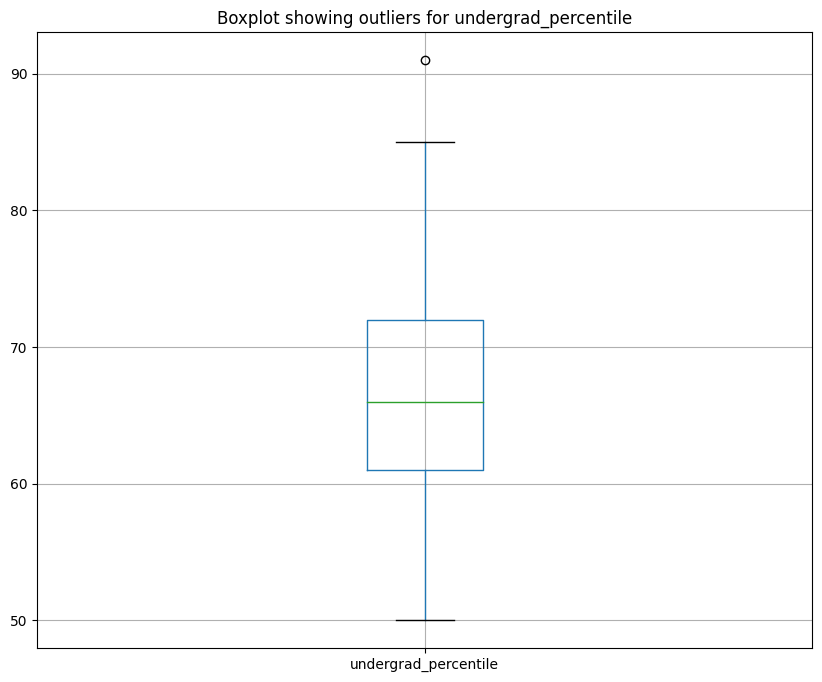

<Figure size 400x400 with 0 Axes>

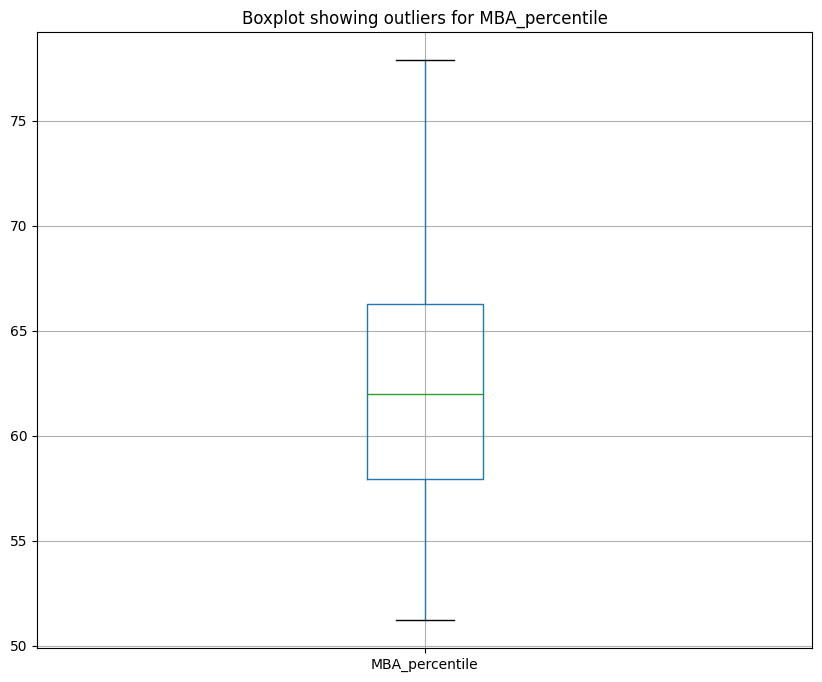

<Figure size 400x400 with 0 Axes>

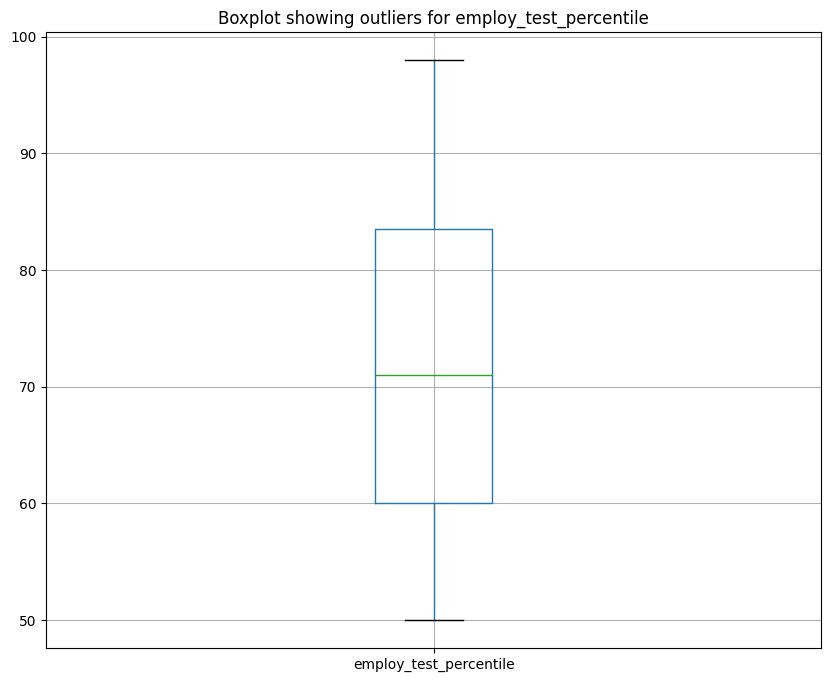

In [29]:
for column in campus_placement_columns:
    plt.figure(figsize=(4,4))
    plotBoxplot(campus_placement, column, f'Boxplot showing outliers for {column}')

These show that there are some outliers in our data, indentified using the Inter Quartile Range (IQR). It makes sense that these outliers exists. If a school is of a certain level, it will attract a more specific student, however there are always students who performed either better (in this case they are using the school as a saftey) or those who performed worse (and are reaching for the school).

These won't be dealt with now for data snooping reasons, however, its worth showing that they exist. Once I employ feature selection, I will split the data, check again for outliers, and then standardize using a method of my choosing.

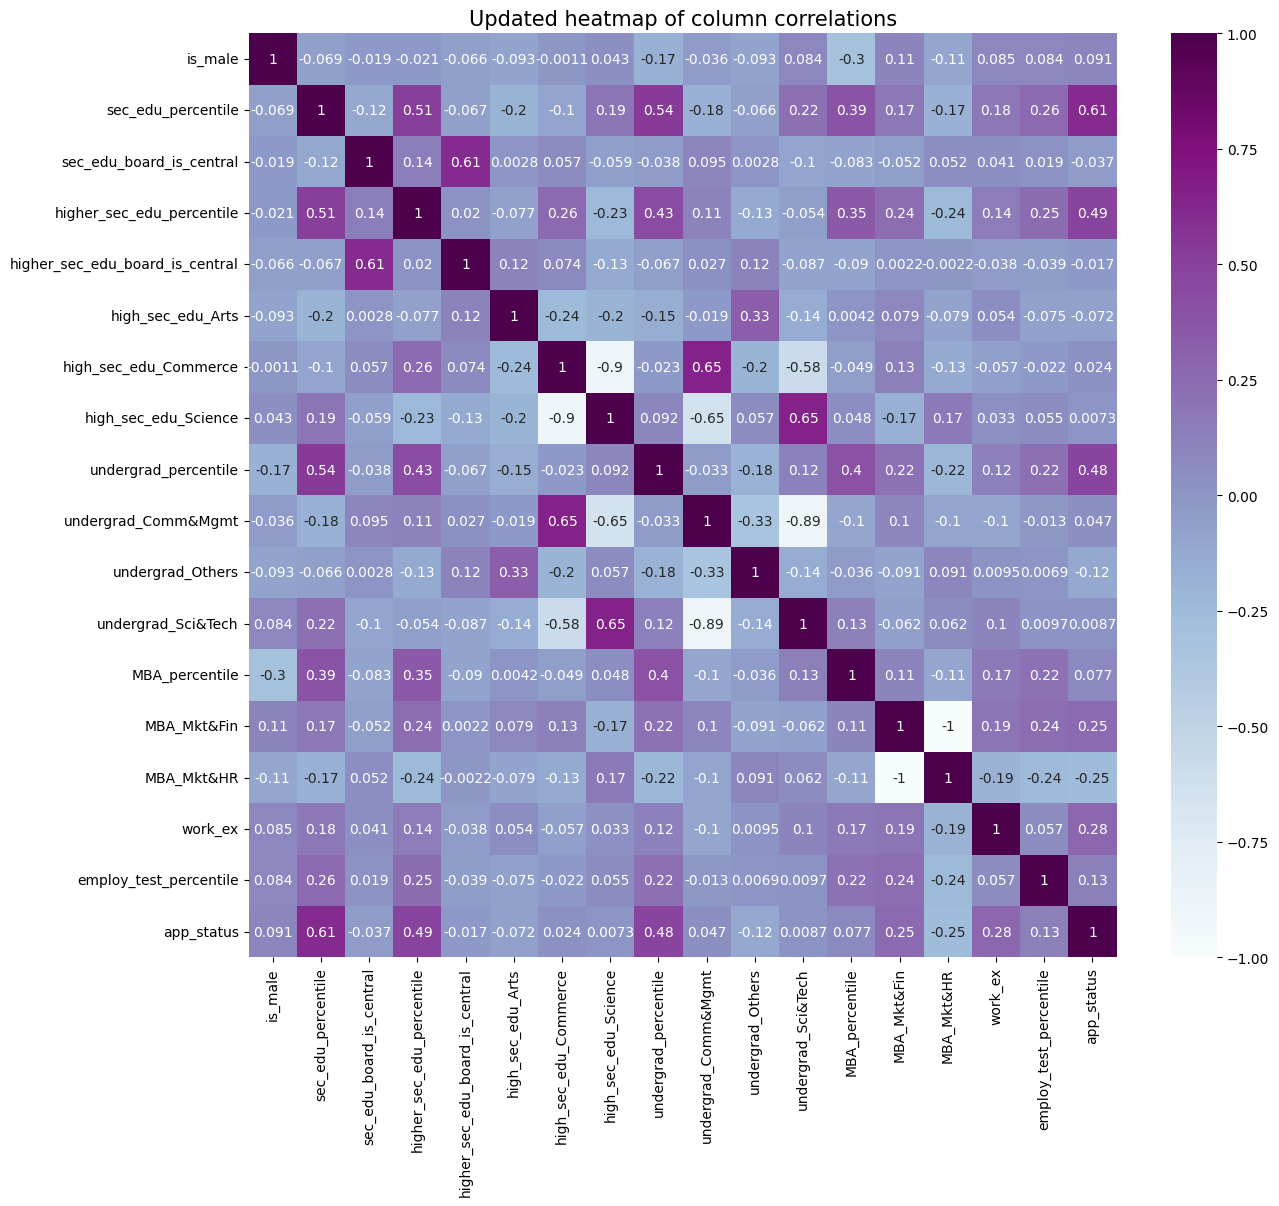

In [30]:
def plotHeatmapLarge(dataframe, title):
    numeric_cols = dataframe.select_dtypes(include=['int', 'float']).columns
    numeric_df = dataframe[numeric_cols]
    plt.figure(figsize=(14,12))
    sns.heatmap(numeric_df.corr(), cmap="BuPu", annot = True)
    plt.title(title, fontsize = 15)
    plt.show()


plotHeatmapLarge(campus_placement, 'Updated heatmap of column correlations')

This correlation matrix gives a good idea of features that will be important to our model. While I could just use my own ideas of imporance to deduct which features should be kept, automated techniques are generally more accepted, and will give my model less bias. To do this, I will use an technique that is widely accpeted, and one that I am familiar with through a different course, random forest classifier.

In [31]:
campus_placement.dtypes

columns_to_delete = ['high_sec_edu_type', 'undergrad_type', 'MBA_type']

campus_placement.drop(columns=columns_to_delete, inplace=True)
campus_placement.head()

,is_male,sec_edu_percentile,sec_edu_board_is_central,higher_sec_edu_percentile,higher_sec_edu_board_is_central,high_sec_edu_Arts,high_sec_edu_Commerce,high_sec_edu_Science,undergrad_percentile,undergrad_Comm&Mgmt,undergrad_Others,undergrad_Sci&Tech,MBA_percentile,MBA_Mkt&Fin,MBA_Mkt&HR,work_ex,employ_test_percentile,app_status
0,1.0,67.00,0.0,91.00,0.0,0,1,0,58.00,0,0,1,58.80,0,1,0.0,55.0,1
1,1.0,79.33,1.0,78.33,0.0,0,0,1,77.48,0,0,1,66.28,1,0,1.0,86.5,1
2,1.0,65.00,1.0,68.00,1.0,1,0,0,64.00,1,0,0,57.80,1,0,0.0,75.0,1
3,1.0,56.00,1.0,52.00,1.0,0,0,1,52.00,0,0,1,59.43,0,1,0.0,66.0,0
4,1.0,85.80,1.0,73.60,1.0,0,1,0,73.30,1,0,0,55.50,1,0,0.0,96.8,1


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


y = campus_placement['app_status']
X = campus_placement.loc[:, campus_placement.columns != 'app_status']

X_campus_placement_rest, X_campus_placement_test, y_campus_placement_rest, y_campus_placement_test = train_test_split(X, y, random_state=42, test_size=0.2)

model = RandomForestClassifier(n_estimators=100)

model.fit(X_campus_placement_rest, y_campus_placement_rest)
importance = model.feature_importances_
importance_for_mask = importance

In [33]:
campus_placement.columns

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                            Feature  Importance
1                sec_edu_percentile    0.260294
3         higher_sec_edu_percentile    0.204225
8              undergrad_percentile    0.193759
12                   MBA_percentile    0.105534
16           employ_test_percentile    0.066082
15                          work_ex    0.030816
14                       MBA_Mkt&HR    0.026974
13                      MBA_Mkt&Fin    0.021303
0                           is_male    0.017660
2          sec_edu_board_is_central    0.017341
4   higher_sec_edu_board_is_central    0.013129
6             high_sec_edu_Commerce    0.009486
7              high_sec_edu_Science    0.008228
9               undergrad_Comm&Mgmt    0.008095
10                 undergrad_Others    0.008000
5                 high_sec_edu_Arts    0.004572
11               undergrad_Sci&Tech    0.004502


([<matplotlib.axis.XTick at 0x781579515870>,
 [Text(0.0, 0, '0.00'),
  Text(0.05, 0, '0.05'),
  Text(0.1, 0, '0.10'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.2, 0, '0.20'),
  Text(0.25, 0, '0.25'),
  Text(0.30000000000000004, 0, '0.30')])

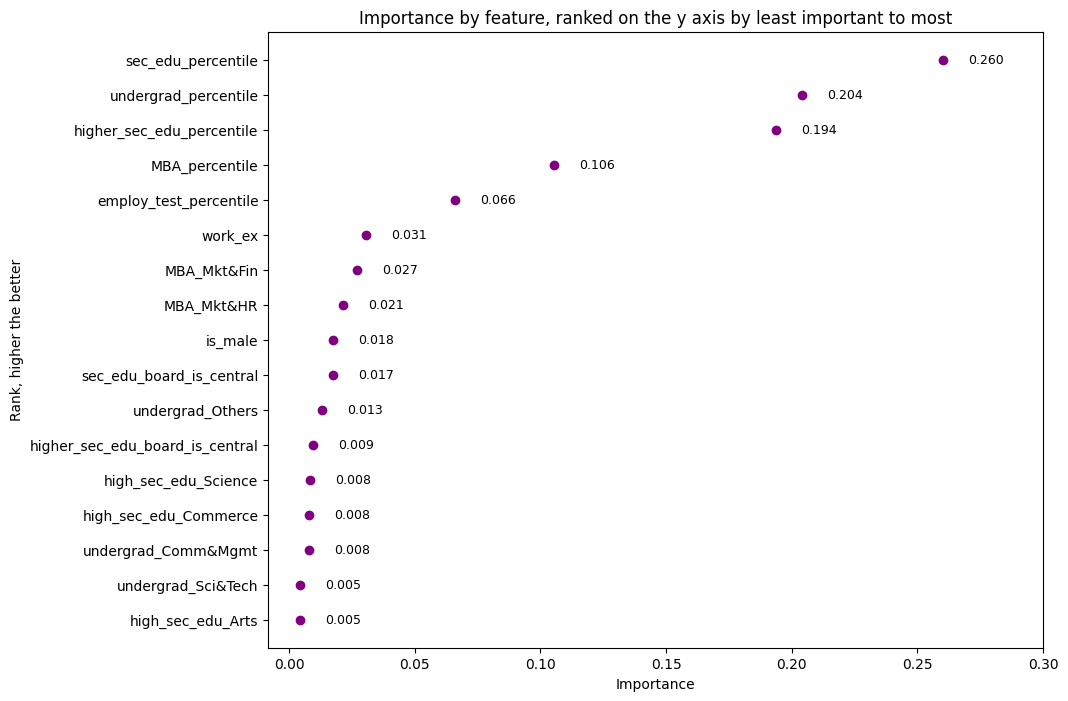

In [34]:
plt.figure(figsize=(10, 8))
plt.scatter(np.sort(importance),np.arange(importance.shape[0]), color = 'purple')
plt.title('Importance by feature, ranked on the y axis by least important to most')
sorted_indices = np.argsort(importance)
sorted_importance = importance[sorted_indices]
for i, importance_value in enumerate(sorted_importance):
    plt.text(importance_value + 0.01, i, f'{importance_value:.3f}', verticalalignment='center', fontsize=9)
plt.xlabel('Importance')
plt.ylabel('Rank, higher the better')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
           ['high_sec_edu_Arts', 'undergrad_Sci&Tech', 'undergrad_Comm&Mgmt', 'high_sec_edu_Commerce',
            'high_sec_edu_Science', 'higher_sec_edu_board_is_central', 'undergrad_Others',
            'sec_edu_board_is_central','is_male', 'MBA_Mkt&HR', 'MBA_Mkt&Fin', 'work_ex',
           'employ_test_percentile', 'MBA_percentile', 'higher_sec_edu_percentile',
           'undergrad_percentile', 'sec_edu_percentile'])
plt.xticks(np.arange(0, 0.32, 0.05))

We see that percentile measurments are easily the most important for the prediction of application status. While I can select them immediately, its more ideal to create a mask in order to verify wether I should select these features.

0.058823529411764705


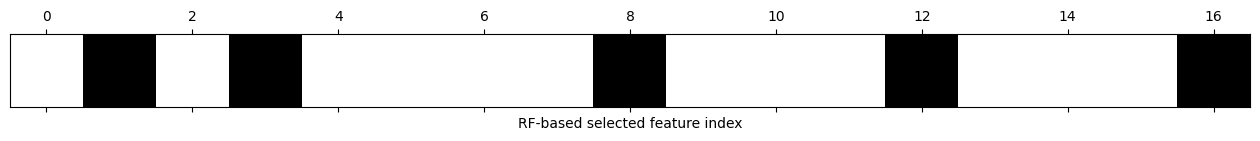

In [35]:
# https://towardsdatascience.com/best-practice-to-calculate-and-interpret-model-feature-importance-14f0e11ee660

mean = importance_for_mask.mean()
print(mean)
mask_campus_placement = importance_for_mask > mean

plt.matshow(mask_campus_placement.reshape(1, -1), cmap='gray_r')
plt.xlabel("RF-based selected feature index")
plt.yticks(())
plt.show()



The mask shows that features 1, 3, 8, 12, 16 are most important. Above, we can see that these values are 'sec_edu_percentile', 'higher_sec_edu_percentile', 'undergrad_percentile', 'MBA_percentile', and 'employ_test_percentile' respectively. I used this mask to select features based on if their importance was greater than the mean of all the importance. The above link spoke about how random forest importance scores can be slightly baised toward numerical data. While I would like to try and implement a better way to measure feature importance, I don't have a great understanding of them, so I will continue using the built in RF importance through scikit.

In [36]:
# Reference: https://stackoverflow.com/questions/45846189/how-to-delete-all-columns-in-dataframe-except-certain-ones
campus_placement_FS = campus_placement.loc[:, ['sec_edu_percentile', 'higher_sec_edu_percentile',
                                               'undergrad_percentile', 'MBA_percentile',
                                              'employ_test_percentile', 'app_status']]
campus_placement_FS

,sec_edu_percentile,higher_sec_edu_percentile,undergrad_percentile,MBA_percentile,employ_test_percentile,app_status
0,67.00,91.00,58.00,58.80,55.0,1
1,79.33,78.33,77.48,66.28,86.5,1
2,65.00,68.00,64.00,57.80,75.0,1
3,56.00,52.00,52.00,59.43,66.0,0
4,85.80,73.60,73.30,55.50,96.8,1
...,...,...,...,...,...,...
210,80.60,82.00,77.60,74.49,91.0,1
211,58.00,60.00,72.00,53.62,74.0,1
212,67.00,67.00,73.00,69.72,59.0,1
213,74.00,66.00,58.00,60.23,70.0,1


## Model Creation and Outlier Handling

There are now two dataframes, one with which we have our feature selection, and another without. It's worth noting that the dataframe with selected features and the one without both have the same percentile columns, which are also the only columns in the dataframe that have outliers. Before we train the model, we will first handle the outliers in a way that does not have any data snooping.

### Outlier Handling

In this case, feature scaling should be used to reduce outliers in our data. Although these outliers are valid percentile measurements, they should still be standardized in order to make sure our evaluations (rscore, accuracy and other measurements that require the usage of mean and standard devialtion) are not negatively effected.

We will not be deleting the outliers as our dataset is too small, but instead using transformation. There are a vairety of transformation techniques, but scikit learn has a built in scaler that will make the values standard normally distributed. It uses this formula:  $z = \frac{{x - u}}{{s}}$ where $x$ is data value, $u$ is mean, and $s$ is the standard deviation.


In [37]:

def plot_histograms(dataframe, column_list):
    num_cols = len(column_list)
    num_rows = num_cols // 2 + num_cols % 2

    plt.figure(figsize=(15, 10))

    for i, column in enumerate(column_list, 1):
        plt.subplot(num_rows, 2, i)
        plt.hist(dataframe[column], bins=20, color='purple', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

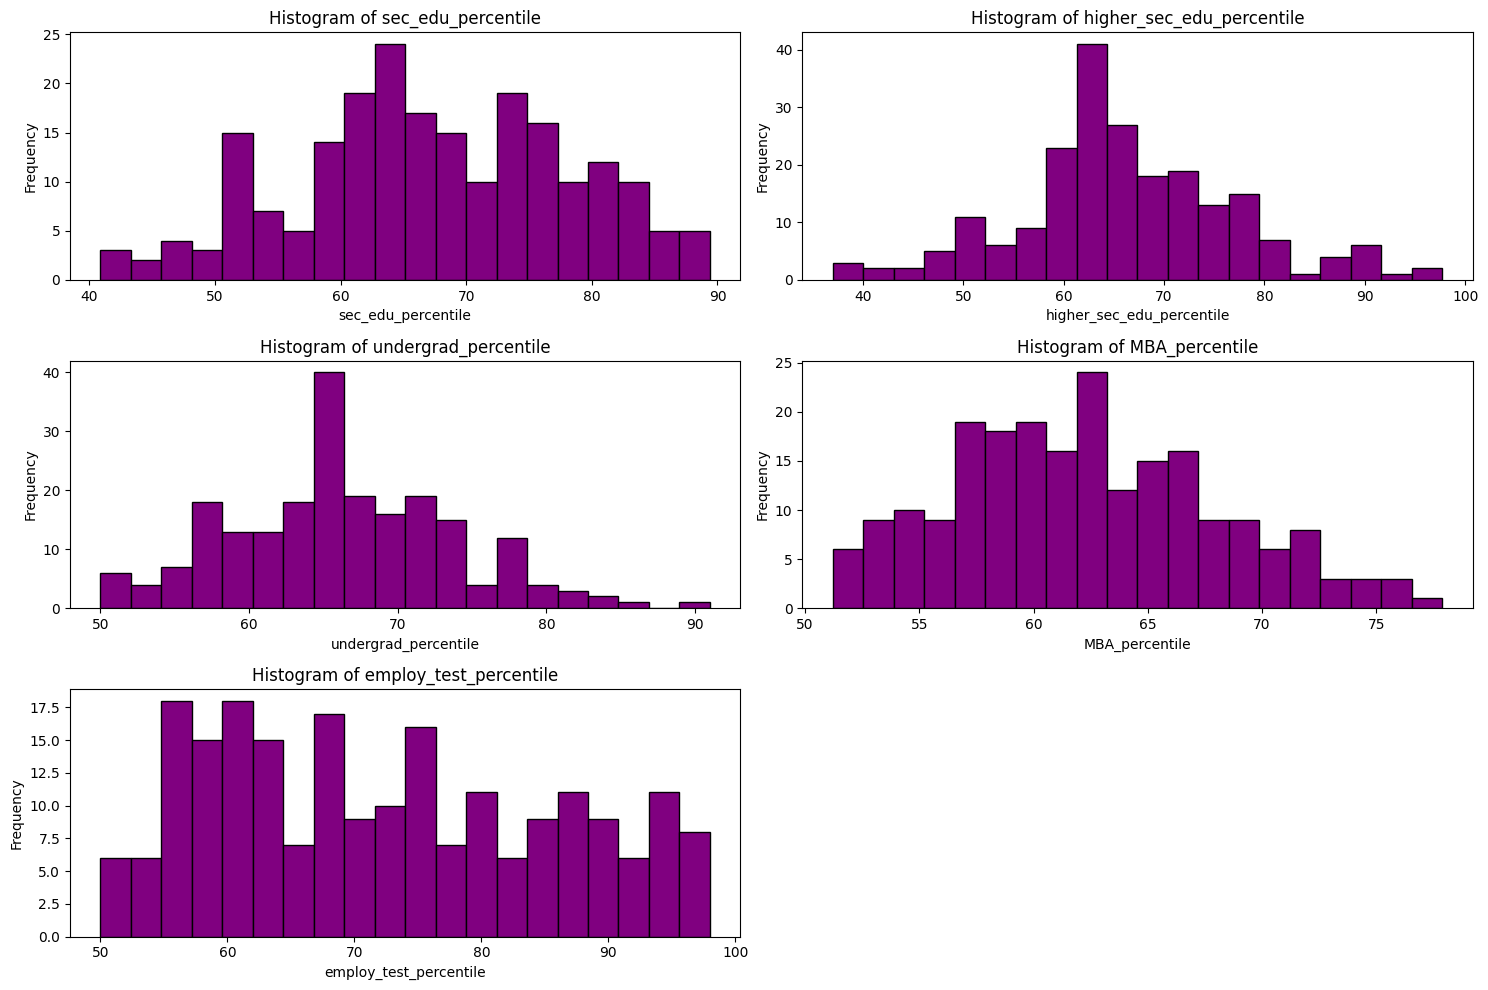

In [38]:
plot_histograms(campus_placement_FS, ['sec_edu_percentile', 'higher_sec_edu_percentile',
                                               'undergrad_percentile', 'MBA_percentile',
                                              'employ_test_percentile'])

The histograms show that much of the data is far from being standard normally distributed. Now to check after the data is scaled.

In [39]:
campus_placement_FS

X_campus_placement_FS = campus_placement_FS[['sec_edu_percentile', 'higher_sec_edu_percentile', 'undergrad_percentile',
                        'MBA_percentile','employ_test_percentile']]
y_campus_placement_FS = campus_placement_FS['app_status']

X_train_campus_placement_FS, X_test_campus_placement_FS, y_train_campus_placement_FS, y_test_campus_placement_FS = train_test_split(X_campus_placement_FS, y_campus_placement_FS, random_state=42, test_size=0.2)



In [40]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train_campus_placement_FS)
X_train_campus_placement_FS = scaler.transform(X_train_campus_placement_FS)
X_test_campus_placement_FS = scaler.transform(X_test_campus_placement_FS)

In [41]:
X_train_campus_placement_FS.shape

(172, 5)

In [42]:
def plot_histograms_with_2d_array(X_train, column_names):
    num_cols = len(column_names)
    num_rows = num_cols // 2 + num_cols % 2

    plt.figure(figsize=(15, 10))

    for i, column in enumerate(column_names, 1):
        plt.subplot(num_rows, 2, i)
        plt.hist(X_train[:, i-1], bins=20, color='purple', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

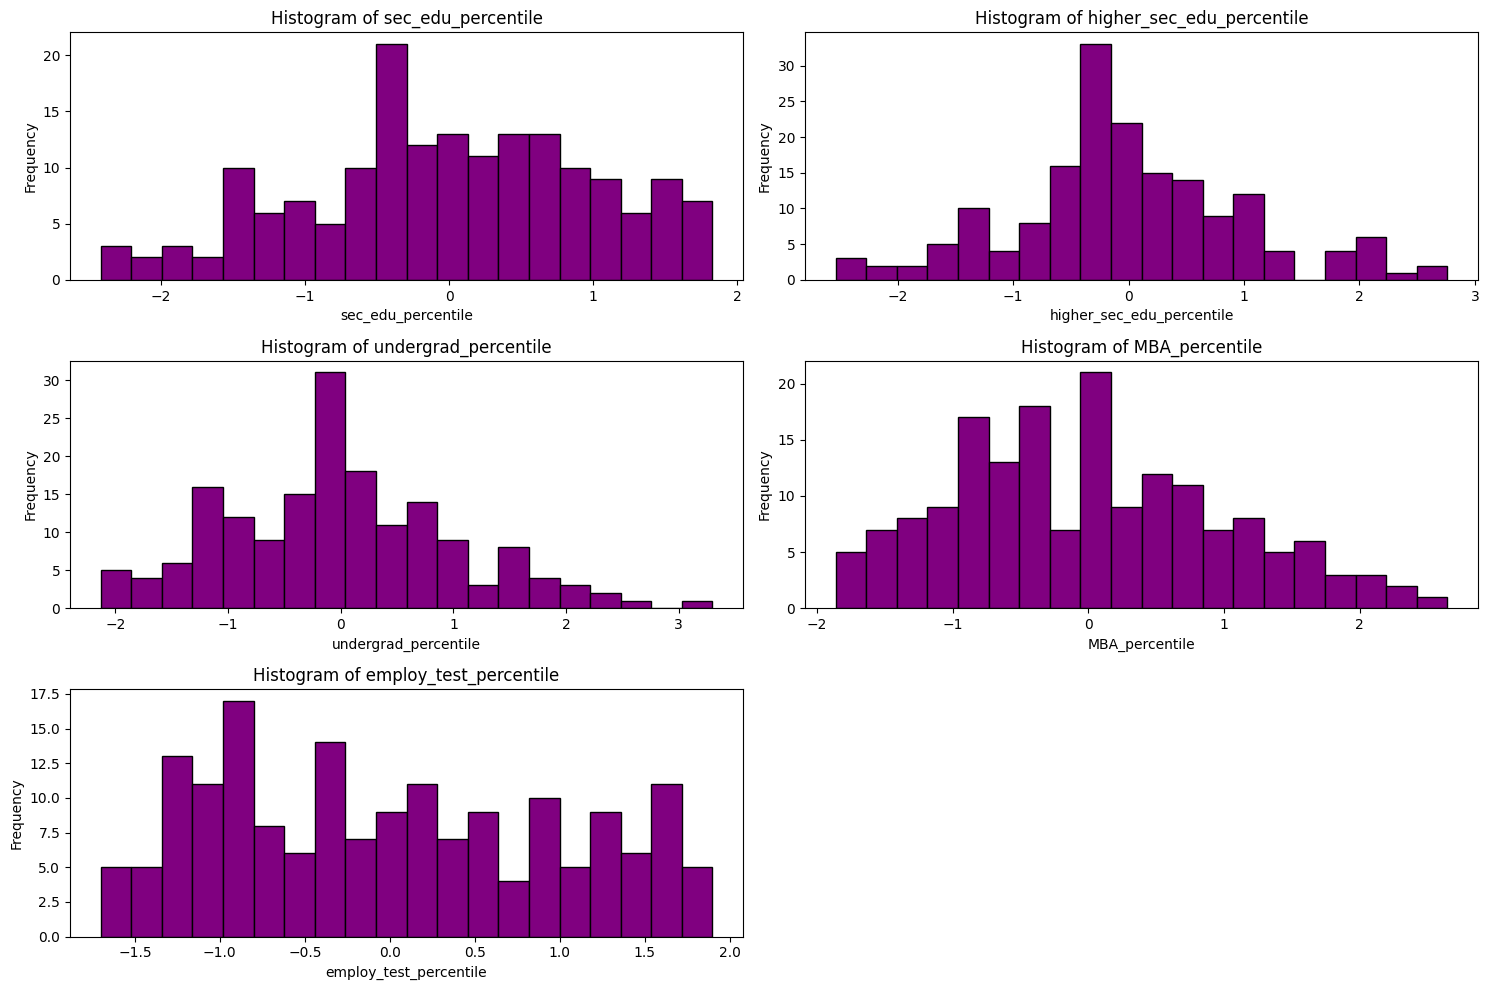

In [43]:
plot_histograms_with_2d_array(X_train_campus_placement_FS, ['sec_edu_percentile','higher_sec_edu_percentile',
                                                             'undergrad_percentile', 'MBA_percentile',
                                                             'employ_test_percentile'])

There are only small differences between the 5 plots. This has to do with the number of data entries (as the first plots show the whole dataframe, and these only show scaled training sets), but also with the scaled data. Since 'sec_edu_percentile', 'MBA_percentile' and 'employ_test_percentile' had no outliers, their histograms should look very similar. The histograms for 'higher_sec_edu_percentile' and 'undergrad_percentile' should show some differences because of some of outliers. However, in comparison to larger or datasets that have more outliers, the scaling appears to not have massively effected the distribution of the data.

In [44]:
campus_placement.columns

Index(['is_male', 'sec_edu_percentile', 'sec_edu_board_is_central',
       'higher_sec_edu_percentile', 'higher_sec_edu_board_is_central',
       'high_sec_edu_Arts', 'high_sec_edu_Commerce', 'high_sec_edu_Science',
       'undergrad_percentile', 'undergrad_Comm&Mgmt', 'undergrad_Others',
       'undergrad_Sci&Tech', 'MBA_percentile', 'MBA_Mkt&Fin', 'MBA_Mkt&HR',
       'work_ex', 'employ_test_percentile', 'app_status'],
      dtype='object')

In [45]:
campus_placement

X_campus_placement = campus_placement[['is_male', 'sec_edu_percentile', 'sec_edu_board_is_central',
                                          'higher_sec_edu_percentile', 'higher_sec_edu_board_is_central',
                                          'high_sec_edu_Arts', 'high_sec_edu_Commerce', 'high_sec_edu_Science',
                                       'undergrad_percentile', 'undergrad_Comm&Mgmt', 'undergrad_Others',
                                       'undergrad_Sci&Tech', 'MBA_percentile', 'MBA_Mkt&Fin', 'MBA_Mkt&HR',
                                       'work_ex', 'employ_test_percentile']]
y_campus_placement = campus_placement['app_status']

X_train_campus_placement, X_test_campus_placement, y_train_campus_placement, y_test_campus_placement = train_test_split(X_campus_placement, y_campus_placement, random_state=42, test_size=0.2)



In [46]:
from sklearn import preprocessing

scaler_no_FS = preprocessing.StandardScaler().fit(X_train_campus_placement)
X_train_campus_placement = scaler_no_FS.transform(X_train_campus_placement)
X_test_campus_placement = scaler_no_FS.transform(X_test_campus_placement)

### Logistic Regression

In [47]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

execution_times_avg_FS_logistic = 0

for i in range(1, 11):
    start_FS_logistic = time.time()
    logistic_model_FS = LogisticRegression()

    logistic_model_FS.fit(X_train_campus_placement_FS, y_train_campus_placement_FS)

    y_pred_FS_logistic = logistic_model_FS.predict(X_test_campus_placement_FS)

    end_FS_logistic = time.time()

    total_time_FS_logistic = end_FS_logistic - start_FS_logistic

    confusion_matrix_FS_logistic = confusion_matrix(y_test_campus_placement_FS, y_pred_FS_logistic)
    confusion_matrix_FS_logistic

    true_positives_FS_logistic = confusion_matrix_FS_logistic[1, 1]
    true_negatives_FS_logistic = confusion_matrix_FS_logistic[0, 0]
    false_positives_FS_logistic = confusion_matrix_FS_logistic[0, 1]
    false_negatives_FS_logistic = confusion_matrix_FS_logistic[1, 0]

    accuracy_FS_logistic = accuracy_score(y_test_campus_placement_FS, y_pred_FS_logistic)
#     print('The accuracy is: ', accuracy_FS_logistic)

    precision_FS_logistic = true_positives_FS_logistic / float (true_positives_FS_logistic +
                                                                false_positives_FS_logistic)

#     print('The precision is: ', precision_FS_logistic)
    execution_times_avg_FS_logistic = execution_times_avg_FS_logistic + total_time_FS_logistic

execution_times_avg_FS_logistic = execution_times_avg_FS_logistic / 10

In [48]:
execution_times_avg_logistic = 0
for i in range(1, 11):
    start_logistic = time.time()
    logistic_model = LogisticRegression()

    logistic_model.fit(X_train_campus_placement, y_train_campus_placement)

    y_pred_logistic = logistic_model.predict(X_test_campus_placement)

    end_logistic = time.time()

    total_time_logistic = end_logistic - start_logistic

    confusion_matrix_logistic = confusion_matrix(y_test_campus_placement, y_pred_logistic)
    confusion_matrix_logistic

    true_positives_logistic = confusion_matrix_logistic[1, 1]
    true_negatives_logistic = confusion_matrix_logistic[0, 0]
    false_positives_logistic = confusion_matrix_logistic[0, 1]
    false_negatives_logistic = confusion_matrix_logistic[1, 0]

    accuracy_logistic = accuracy_score(y_test_campus_placement, y_pred_logistic)
#     print('The accuracy is: ', accuracy_logistic)

    precision_logistic = true_positives_logistic / float(true_positives_logistic + false_positives_logistic)

#     print('The precision is: ', precision_logistic)
#     print('The total time is: ', total_time_logistic)
    execution_times_avg_logistic = execution_times_avg_logistic + total_time_logistic
execution_times_avg_logistic = execution_times_avg_logistic / 10

### Neural Network

This might not work very well, considering that there is only 214 rows of data. I would predict that the non-feature selected method would work better, as there will be significantly more data.

In [49]:
X_campus_placement = campus_placement[['is_male', 'sec_edu_percentile', 'sec_edu_board_is_central',
                                          'higher_sec_edu_percentile', 'higher_sec_edu_board_is_central',
                                          'high_sec_edu_Arts', 'high_sec_edu_Commerce', 'high_sec_edu_Science',
                                       'undergrad_percentile', 'undergrad_Comm&Mgmt', 'undergrad_Others',
                                       'undergrad_Sci&Tech', 'MBA_percentile', 'MBA_Mkt&Fin', 'MBA_Mkt&HR',
                                       'work_ex', 'employ_test_percentile']]
y_campus_placement = campus_placement['app_status']

X_campus_placement_FS = campus_placement_FS[['sec_edu_percentile', 'higher_sec_edu_percentile',
                                             'undergrad_percentile', 'MBA_percentile','employ_test_percentile']]
y_campus_placement_FS = campus_placement_FS['app_status']


X_train_campus_placement_NN, X_test_campus_placement_NN, y_train_campus_placement_NN, y_test_campus_placement_NN = train_test_split(X_campus_placement, y_campus_placement, random_state=42, test_size=0.2)

X_train_campus_placement_FS_NN, X_test_campus_placement_FS_NN, y_train_campus_placement_FS_NN, y_test_campus_placement_FS_NN = train_test_split(X_campus_placement_FS, y_campus_placement_FS, random_state=42, test_size=0.2)

scaler_no_FS = preprocessing.StandardScaler().fit(X_train_campus_placement_NN)
X_train_campus_placement_NN = scaler_no_FS.transform(X_train_campus_placement_NN)
X_test_campus_placement_NN = scaler_no_FS.transform(X_test_campus_placement_NN)

scaler_FS = preprocessing.StandardScaler().fit(X_train_campus_placement_FS_NN)
X_train_campus_placement_FS_NN = scaler_FS.transform(X_train_campus_placement_FS_NN)
X_test_campus_placement_FS_NN = scaler_FS.transform(X_test_campus_placement_FS_NN)




We resplit the data for each, and then rescale.

#### For Feature Selected

In [50]:
from sklearn.neural_network import MLPClassifier

# clf_FS = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4,20), random_state=1,
#                     learning_rate = 'invscaling', max_iter = 500)


execution_times_avg_FS_NN = 0
for i in range(1, 11):
    start_FS_NN = time.time()
    clf_FS = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(4,20), random_state=1,
                        learning_rate = 'invscaling', max_iter = 500)

    clf_FS.fit(X_train_campus_placement_FS_NN, y_train_campus_placement_FS_NN)
    y_pred_FS_NN = clf_FS.predict(X_test_campus_placement_FS_NN)

    end_FS_NN = time.time()

    total_time_FS_NN = end_FS_NN - start_FS_NN

    confusion_matrix_FS_NN = confusion_matrix(y_test_campus_placement_FS_NN, y_pred_FS_NN)
    confusion_matrix_FS_NN

    true_positives_FS_NN = confusion_matrix_FS_NN[1, 1]
    true_negatives_FS_NN = confusion_matrix_FS_NN[0, 0]
    false_positives_FS_NN = confusion_matrix_FS_NN[0, 1]
    false_negatives_FS_NN = confusion_matrix_FS_NN[1, 0]

    accuracy_FS_NN = accuracy_score(y_test_campus_placement_FS_NN, y_pred_FS_NN)
#     print('The accuracy is: ', accuracy_FS_NN)

    precision_FS_NN = true_positives_FS_NN / float(true_positives_FS_NN + false_positives_FS_NN)

#     print('The precision is: ', precision_FS_NN)
    print('The execution time is: ', total_time_FS_NN)
    execution_times_avg_FS_NN = execution_times_avg_FS_NN + total_time_FS_NN
execution_times_avg_FS_NN = execution_times_avg_FS_NN / 10

The execution time is:  0.3243274688720703
The execution time is:  0.270097017288208
The execution time is:  0.3561859130859375
The execution time is:  0.42072534561157227
The execution time is:  0.23927688598632812
The execution time is:  0.2715115547180176
The execution time is:  0.25925540924072266
The execution time is:  0.26357579231262207
The execution time is:  0.40642809867858887
The execution time is:  0.2738363742828369


#### For non feature selected

In [51]:
from sklearn.neural_network import MLPClassifier

execution_times_avg_NN = 0
for i in range(1, 11):
    start_NN = time.time()

    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(9, 2), random_state=1,
                        learning_rate = 'invscaling', max_iter = 500)

    clf.fit(X_train_campus_placement_NN, y_train_campus_placement_NN)
    y_pred_NN = clf.predict(X_test_campus_placement_NN)
    end_NN = time.time()

    total_time_NN = end_NN - start_NN

    confusion_matrix_NN = confusion_matrix(y_test_campus_placement_NN, y_pred_NN)
    confusion_matrix_NN

    true_positives_NN = confusion_matrix_NN[1, 1]
    true_negatives_NN = confusion_matrix_NN[0, 0]
    false_positives_NN = confusion_matrix_NN[0, 1]
    false_negatives_NN = confusion_matrix_NN[1, 0]

    accuracy_NN = accuracy_score(y_test_campus_placement_NN, y_pred_NN)
#     print('The accuracy is: ', accuracy_NN)

    precision_NN = true_positives_NN / float(true_positives_NN + false_positives_NN)

#     print('The precision is: ', precision_NN)
    print('The execution time is: ', total_time_NN)
    execution_times_avg_NN = execution_times_avg_NN + total_time_NN
execution_times_avg_NN = execution_times_avg_NN / 10

The execution time is:  0.056905269622802734
The execution time is:  0.08868622779846191
The execution time is:  0.11563611030578613
The execution time is:  0.13459157943725586
The execution time is:  0.16724324226379395
The execution time is:  0.20936989784240723
The execution time is:  0.17184042930603027
The execution time is:  0.1731259822845459
The execution time is:  0.2598097324371338
The execution time is:  0.1773519515991211


### Gradient Boosting Classifier

I have never used gradient boosting algorithms, and for this reason attempted to use it here. I understand it is extremely competent at predicting classifcation given complicated relationships between features.

In [52]:
X_campus_placement = campus_placement[['is_male', 'sec_edu_percentile', 'sec_edu_board_is_central',
                                          'higher_sec_edu_percentile', 'higher_sec_edu_board_is_central',
                                          'high_sec_edu_Arts', 'high_sec_edu_Commerce', 'high_sec_edu_Science',
                                       'undergrad_percentile', 'undergrad_Comm&Mgmt', 'undergrad_Others',
                                       'undergrad_Sci&Tech', 'MBA_percentile', 'MBA_Mkt&Fin', 'MBA_Mkt&HR',
                                       'work_ex', 'employ_test_percentile']]
y_campus_placement = campus_placement['app_status']

X_campus_placement_FS = campus_placement_FS[['sec_edu_percentile', 'higher_sec_edu_percentile',
                                             'undergrad_percentile', 'MBA_percentile','employ_test_percentile']]
y_campus_placement_FS = campus_placement_FS['app_status']


X_train_campus_placement_GBC, X_test_campus_placement_GBC, y_train_campus_placement_GBC, y_test_campus_placement_GBC = train_test_split(X_campus_placement, y_campus_placement, random_state=42, test_size=0.2)

X_train_campus_placement_FS_GBC, X_test_campus_placement_FS_GBC, y_train_campus_placement_FS_GBC, y_test_campus_placement_FS_GBC = train_test_split(X_campus_placement_FS, y_campus_placement_FS, random_state=42, test_size=0.2)

scaler_no_FS = preprocessing.StandardScaler().fit(X_train_campus_placement_GBC)
X_train_campus_placement_GBC = scaler_no_FS.transform(X_train_campus_placement_GBC)
X_test_campus_placement_GBC = scaler_no_FS.transform(X_test_campus_placement_GBC)

scaler_FS = preprocessing.StandardScaler().fit(X_train_campus_placement_FS_GBC)
X_train_campus_placement_FS_GBC = scaler_FS.transform(X_train_campus_placement_FS_GBC)
X_test_campus_placement_FS_GBC = scaler_FS.transform(X_test_campus_placement_FS_GBC)


#### For feature selected

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

execution_times_avg_FS_GBC = 0
for i in range(1, 11):
    start_FS_GBC = time.time()

    GBC_FS = GradientBoostingClassifier(n_estimators=100, learning_rate=30.0,
                                     max_depth=14, random_state=0)

    GBC_FS.fit(X_train_campus_placement_FS_GBC, y_train_campus_placement_FS_GBC)

    y_pred_FS_GBC = GBC_FS.predict(X_test_campus_placement_FS_GBC)

    end_FS_GBC = time.time()

    total_time_FS_GBC = end_FS_GBC - start_FS_GBC

    confusion_matrix_FS_GBC = confusion_matrix(y_test_campus_placement_FS_GBC, y_pred_FS_GBC)

    true_positives_FS_GBC = confusion_matrix_FS_GBC[1, 1]
    true_negatives_FS_GBC = confusion_matrix_FS_GBC[0, 0]
    false_positives_FS_GBC = confusion_matrix_FS_GBC[0, 1]
    false_negatives_FS_GBC = confusion_matrix_FS_GBC[1, 0]

    accuracy_FS_GBC = accuracy_score(y_test_campus_placement_FS_GBC, y_pred_FS_GBC)
#     print('The accuracy is: ', accuracy_FS_GBC)

    precision_FS_GBC = true_positives_FS_GBC / float(true_positives_FS_GBC + false_positives_FS_GBC)

#     print('The precision is: ', precision_FS_GBC)
#     print('The execution time is: ', total_time_FS_GBC)
    execution_times_avg_FS_GBC = execution_times_avg_FS_GBC + total_time_FS_GBC
execution_times_avg_FS_GBC = execution_times_avg_FS_GBC / 10

#### For non feature selected

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

execution_times_avg_GBC = 0
for i in range(1, 11):
    start_GBC = time.time()

    GBC = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0,
                                     max_depth=15, random_state=0)

    GBC.fit(X_train_campus_placement_GBC, y_train_campus_placement_GBC)

    y_pred_GBC = GBC.predict(X_test_campus_placement_GBC)

    end_GBC = time.time()

    total_time_GBC = end_GBC - start_GBC

    confusion_matrix_GBC = confusion_matrix(y_test_campus_placement_GBC, y_pred_GBC)

    true_positives_GBC = confusion_matrix_GBC[1, 1]
    true_negatives_GBC = confusion_matrix_GBC[0, 0]
    false_positives_GBC = confusion_matrix_GBC[0, 1]
    false_negatives_GBC = confusion_matrix_GBC[1, 0]

    accuracy_GBC = accuracy_score(y_test_campus_placement_GBC, y_pred_GBC)
#     print('The accuracy is: ', accuracy_GBC)

    precision_GBC = true_positives_GBC / float(true_positives_GBC + false_positives_GBC)

#     print('The precision is: ', precision_GBC)
#     print('The execution time is: ', total_time_GBC)
    execution_times_avg_GBC = execution_times_avg_GBC + total_time_GBC
execution_times_avg_GBC = execution_times_avg_GBC / 10


Moved little besides when I increased the max_depth. Very interesting, look into why it adjusts such a small amount.

### Random Forest Regression

In [55]:
X_campus_placement = campus_placement[['is_male', 'sec_edu_percentile', 'sec_edu_board_is_central',
                                          'higher_sec_edu_percentile', 'higher_sec_edu_board_is_central',
                                          'high_sec_edu_Arts', 'high_sec_edu_Commerce', 'high_sec_edu_Science',
                                       'undergrad_percentile', 'undergrad_Comm&Mgmt', 'undergrad_Others',
                                       'undergrad_Sci&Tech', 'MBA_percentile', 'MBA_Mkt&Fin', 'MBA_Mkt&HR',
                                       'work_ex', 'employ_test_percentile']]
y_campus_placement = campus_placement['app_status']

X_campus_placement_FS = campus_placement_FS[['sec_edu_percentile', 'higher_sec_edu_percentile',
                                             'undergrad_percentile', 'MBA_percentile','employ_test_percentile']]
y_campus_placement_FS = campus_placement_FS['app_status']


X_train_campus_placement_RFR, X_test_campus_placement_RFR, y_train_campus_placement_RFR, y_test_campus_placement_RFR = train_test_split(X_campus_placement, y_campus_placement, random_state=42, test_size=0.2)

X_train_campus_placement_FS_RFR, X_test_campus_placement_FS_RFR, y_train_campus_placement_FS_RFR, y_test_campus_placement_FS_RFR = train_test_split(X_campus_placement_FS, y_campus_placement_FS, random_state=42, test_size=0.2)

scaler_no_FS = preprocessing.StandardScaler().fit(X_train_campus_placement_RFR)
X_train_campus_placement_RFR = scaler_no_FS.transform(X_train_campus_placement_RFR)
X_test_campus_placement_RFR = scaler_no_FS.transform(X_test_campus_placement_RFR)

scaler_FS = preprocessing.StandardScaler().fit(X_train_campus_placement_FS_RFR)
X_train_campus_placement_FS_RFR = scaler_FS.transform(X_train_campus_placement_FS_RFR)
X_test_campus_placement_FS_RFR = scaler_FS.transform(X_test_campus_placement_FS_RFR)


#### For feature selected

In [56]:
from sklearn.ensemble import RandomForestClassifier

execution_times_avg_FS_RFC = 0
for i in range(1, 11):
    start_FS_RFR = time.time()

    RFR_FS = RandomForestClassifier(n_estimators=100, max_features = 'sqrt',
                                     max_depth=14, random_state=0)

    RFR_FS.fit(X_train_campus_placement_FS_RFR, y_train_campus_placement_FS_RFR)

    y_pred_FS_RFR = RFR_FS.predict(X_test_campus_placement_FS_RFR)

    end_FS_RFR = time.time()

    total_time_FS_RFR = end_FS_RFR - start_FS_RFR

    confusion_matrix_FS_RFR = confusion_matrix(y_test_campus_placement_FS_RFR, y_pred_FS_RFR)

    true_positives_FS_RFR = confusion_matrix_FS_RFR[1, 1]
    true_negatives_FS_RFR = confusion_matrix_FS_RFR[0, 0]
    false_positives_FS_RFR = confusion_matrix_FS_RFR[0, 1]
    false_negatives_FS_RFR = confusion_matrix_FS_RFR[1, 0]

    accuracy_FS_RFR = accuracy_score(y_test_campus_placement_FS_RFR, y_pred_FS_RFR)
#     print('The accuracy is: ', accuracy_FS_RFR)

    precision_FS_RFR = true_positives_FS_RFR / float(true_positives_FS_RFR + false_positives_FS_RFR)

#     print('The precision is: ', precision_FS_RFR)
#     print('The execution time is: ', total_time_FS_RFR)
    execution_times_avg_FS_RFC = execution_times_avg_FS_RFC + total_time_FS_RFR
execution_times_avg_FS_RFC = execution_times_avg_FS_RFC / 10

#### For non feature selected

In [57]:
from sklearn.ensemble import RandomForestClassifier

execution_times_avg_RFC = 0


for i in range(1, 11):
    start_RFR = time.time()

    RFR = RandomForestClassifier(n_estimators=100, max_features = 'sqrt',
                                     max_depth=10, random_state=0)

    RFR.fit(X_train_campus_placement_RFR, y_train_campus_placement_RFR)

    y_pred_RFR = RFR.predict(X_test_campus_placement_RFR)

    end_RFR = time.time()

    total_time_RFR = end_RFR - start_RFR

    confusion_matrix_RFR = confusion_matrix(y_test_campus_placement_RFR, y_pred_RFR)

    true_positives_RFR = confusion_matrix_RFR[1, 1]
    true_negatives_RFR = confusion_matrix_RFR[0, 0]
    false_positives_RFR = confusion_matrix_RFR[0, 1]
    false_negatives_RFR = confusion_matrix_RFR[1, 0]

    accuracy_RFR = accuracy_score(y_test_campus_placement_RFR, y_pred_RFR)
#     print('The accuracy is: ', accuracy_RFR)

    precision_RFR = true_positives_RFR / float(true_positives_RFR + false_positives_RFR)

#     print('The precision is: ', precision_RFR)
#     print('The execution time is: ', total_time_RFR)
    execution_times_avg_RFC = execution_times_avg_RFC + total_time_RFR
execution_times_avg_RFC = execution_times_avg_RFC / 10

The deeper the depth the of the trees, the more the data tends to overfit, therefore causing decreases in testing data prediction.

### Keras Deep Learning

In [62]:
X_campus_placement = campus_placement[['is_male', 'sec_edu_percentile', 'sec_edu_board_is_central',
                                          'higher_sec_edu_percentile', 'higher_sec_edu_board_is_central',
                                          'high_sec_edu_Arts', 'high_sec_edu_Commerce', 'high_sec_edu_Science',
                                       'undergrad_percentile', 'undergrad_Comm&Mgmt', 'undergrad_Others',
                                       'undergrad_Sci&Tech', 'MBA_percentile', 'MBA_Mkt&Fin', 'MBA_Mkt&HR',
                                       'work_ex', 'employ_test_percentile']]
y_campus_placement = campus_placement['app_status']

X_campus_placement_FS = campus_placement_FS[['sec_edu_percentile', 'higher_sec_edu_percentile',
                                             'undergrad_percentile', 'MBA_percentile','employ_test_percentile']]
y_campus_placement_FS = campus_placement_FS['app_status']


X_train_campus_placement_Keras, X_test_campus_placement_Keras, y_train_campus_placement_Keras, y_test_campus_placement_Keras = train_test_split(X_campus_placement, y_campus_placement, random_state=42, test_size=0.2)

X_train_campus_placement_FS_Keras, X_test_campus_placement_FS_Keras, y_train_campus_placement_FS_Keras, y_test_campus_placement_FS_Keras = train_test_split(X_campus_placement_FS, y_campus_placement_FS, random_state=42, test_size=0.2)

scaler_no_FS = preprocessing.StandardScaler().fit(X_train_campus_placement_Keras)
X_train_campus_placement_Keras = scaler_no_FS.transform(X_train_campus_placement_Keras)
X_test_campus_placement_Keras = scaler_no_FS.transform(X_test_campus_placement_Keras)

scaler_FS = preprocessing.StandardScaler().fit(X_train_campus_placement_FS_Keras)
X_train_campus_placement_FS_Keras = scaler_FS.transform(X_train_campus_placement_FS_Keras)
X_test_campus_placement_FS_Keras = scaler_FS.transform(X_test_campus_placement_FS_Keras)

#### For feature selected

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score

execution_times_avg_FS_Keras = 0
for i in range(1, 11):
  start_FS_Keras = time.time()
  model_FS_Keras = Sequential([
      Dense(64, activation='relu', input_shape=(5,)),
      Dense(256, activation='relu'),
      Dense(64, activation='relu'),
      Dense(1, activation='sigmoid')
  ])


  model_FS_Keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  model_FS_Keras.fit(X_train_campus_placement_FS_Keras, y_train_campus_placement_FS_Keras, batch_size=32, epochs=1, verbose=1, validation_split=0.1)

  y_pred_FS_Keras = model_FS_Keras.predict(X_test_campus_placement_FS_Keras)

  y_pred_FS_Keras = (y_pred_FS_Keras > 0.5).astype(int)

  end_FS_Keras = time.time()

  total_time_FS_Keras = end_FS_Keras - start_FS_Keras

  accuracy_FS_Keras = accuracy_score(y_test_campus_placement_FS_Keras, y_pred_FS_Keras)

  precision_FS_Keras = precision_score(y_test_campus_placement_FS_Keras, y_pred_FS_Keras)

  execution_times_avg_FS_Keras = execution_times_avg_FS_Keras + total_time_FS_Keras


execution_times_avg_FS_Keras = execution_times_avg_FS_Keras / 10


2/2 [==============================] - 0s 9ms/step


#### For non feature selected

In [122]:
execution_times_avg_Keras = 0
for i in range(1, 11):
  start_Keras = time.time()
  model_Keras = Sequential([
      Dense(64, activation='relu', input_shape=(17,)),
      Dense(256, activation='relu'),
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1, activation='sigmoid')
  ])


  model_Keras.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

  model_Keras.fit(X_train_campus_placement_Keras, y_train_campus_placement_Keras, batch_size=32, epochs=1, verbose=1, validation_split=0.1)

  y_pred_Keras = model_Keras.predict(X_test_campus_placement_Keras)

  y_pred_Keras = (y_pred_Keras > 0.5).astype(int)

  end_Keras = time.time()

  total_time_Keras = end_Keras - start_Keras

  accuracy_Keras = accuracy_score(y_test_campus_placement_Keras, y_pred_Keras)

  precision_Keras = precision_score(y_test_campus_placement_Keras, y_pred_Keras)

  execution_times_avg_Keras = execution_times_avg_Keras + total_time_Keras


execution_times_avg_Keras = execution_times_avg_Keras / 10

2/2 [==============================] - 0s 5ms/step


### Comparison

In [134]:
model_accuracy = [accuracy_FS_logistic, accuracy_logistic, accuracy_FS_NN, accuracy_NN, accuracy_FS_GBC,
                 accuracy_GBC, accuracy_FS_RFR, accuracy_RFR, accuracy_FS_Keras, accuracy_Keras]
model_precision = [precision_FS_logistic, precision_logistic, precision_FS_NN, precision_NN,
                  precision_FS_GBC, precision_GBC, precision_FS_RFR, precision_RFR, precision_FS_Keras,
                   precision_Keras]
model_execution_time_avg = [execution_times_avg_FS_logistic, execution_times_avg_logistic, execution_times_avg_FS_NN,
                            execution_times_avg_NN, execution_times_avg_FS_GBC, execution_times_avg_GBC,
                            execution_times_avg_FS_RFC, execution_times_avg_RFC, execution_times_avg_FS_Keras,
                            execution_times_avg_Keras]

print(model_execution_time_avg)

[0.010404539108276368, 0.015716552734375, 0.30852198600769043, 0.1554560422897339, 0.20294053554534913, 0.056945276260375974, 0.21167454719543458, 0.14938852787017823, 1.455339741706848, 1.843806791305542]


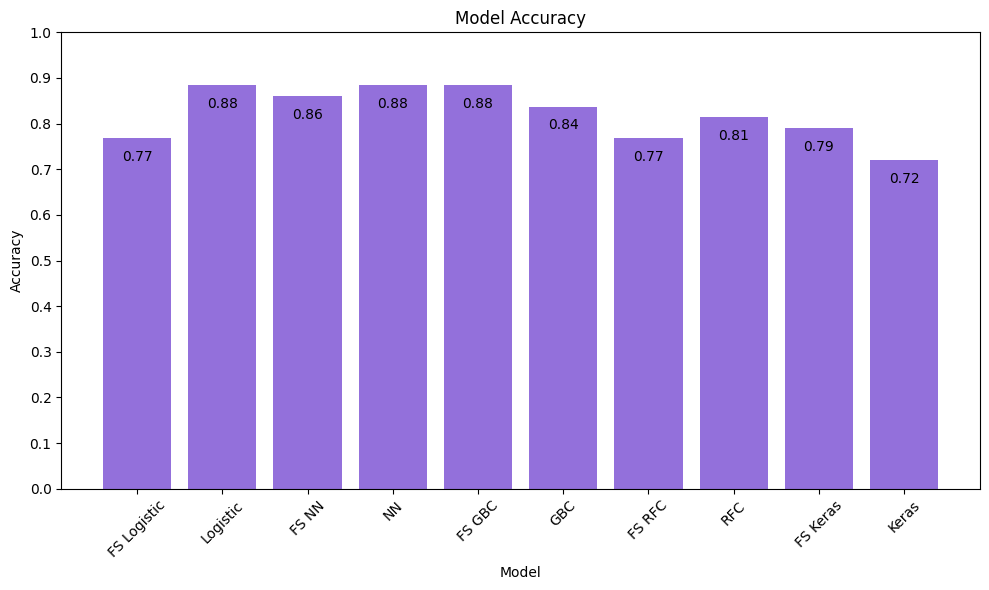

In [129]:
labels = ['FS Logistic', 'Logistic', 'FS NN', 'NN', 'FS GBC', 'GBC', 'FS RFC', 'RFC', 'FS Keras', 'Keras']

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, model_accuracy, color='mediumpurple')

for bar, accuracy in zip(bars, model_accuracy):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{accuracy:.2f}',
            ha='center', color='black', fontsize=10)

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy')

# Show the plot
plt.xticks(rotation=45)
plt.yticks([i / 10 for i in range(11)])
plt.tight_layout()
plt.show()


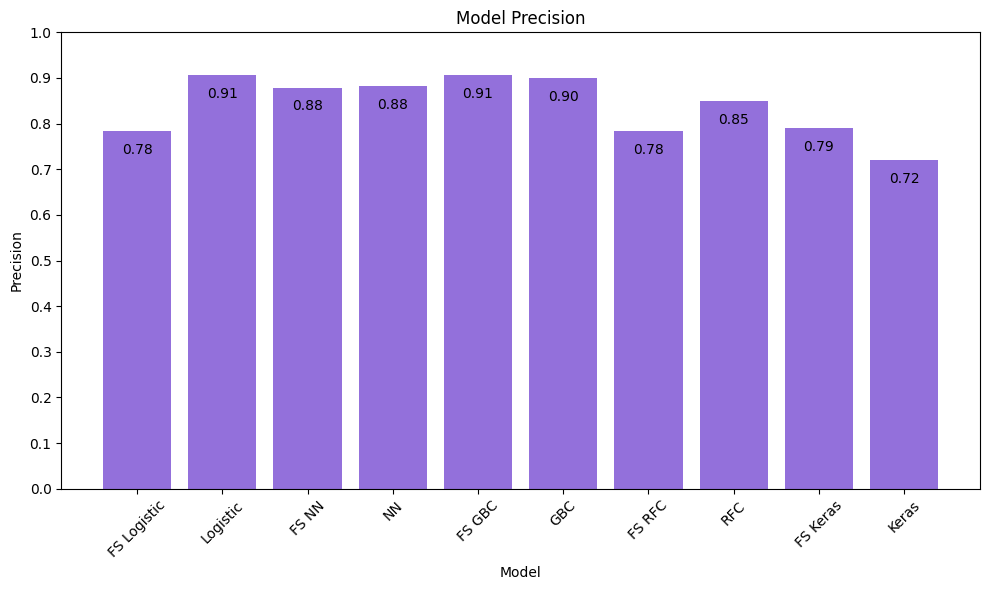

In [130]:
labels = ['FS Logistic', 'Logistic', 'FS NN', 'NN', 'FS GBC', 'GBC', 'FS RFC', 'RFC', 'FS Keras', 'Keras']
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, model_precision, color='mediumpurple')

for bar, precision in zip(bars, model_precision):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{precision:.2f}',
            ha='center', color='black', fontsize=10)

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Precision')
ax.set_title('Model Precision')

# Show the plot
plt.xticks(rotation=45)
plt.yticks([i / 10 for i in range(11)])
plt.tight_layout()
plt.show()


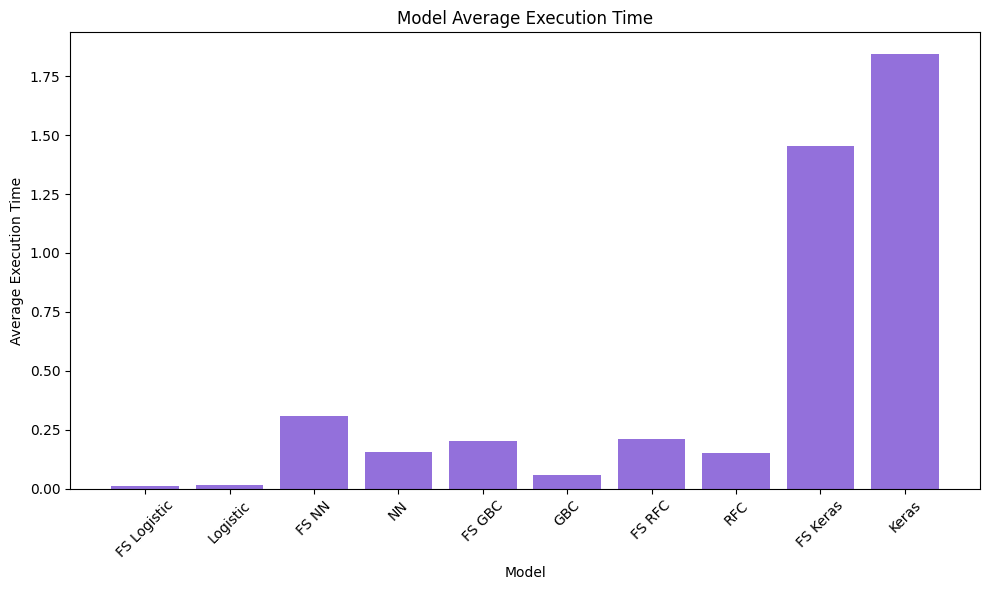

In [131]:
labels = ['FS Logistic', 'Logistic', 'FS NN', 'NN', 'FS GBC', 'GBC', 'FS RFC', 'RFC', 'FS Keras', 'Keras']
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, model_execution_time_avg, color='mediumpurple')


# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Average Execution Time')
ax.set_title('Model Average Execution Time')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [61]:
x